# Módulo 07, Tarefa 01

Vamos começar a mexer na nossa base de projeto? Já fizemos um exercício de montar a variável resposta, já pudemos perceber que essa atividade pode não ser trivial. Vamos agora trabalhar a base para que fique propícia ao *scikitlearn* para trabalharmos.

Lembrando, a base se chama demo01.csv, e originalmente está publicada [aqui](https://www.kaggle.com/rikdifos/credit-card-approval-prediction).

#### 1) Carregue a base e avalie:

- As variáveis
- Tipos de dados de cada variável
- Quantidade de missings
- Distribuição da variável resposta (mau)

In [2]:
#As variáveis
import numpy as np
import pandas as pd
import seaborn as sns

df = pd.read_csv('demo01.csv')
df.columns

Index(['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos',
       'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia', 'idade',
       'tempo_emprego', 'possui_celular', 'possui_fone_comercial',
       'possui_fone', 'possui_email', 'qt_pessoas_residencia', 'mau'],
      dtype='object')

In [3]:
#Os tipos de dados
df.dtypes

sexo                      object
posse_de_veiculo          object
posse_de_imovel           object
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                    float64
tempo_emprego            float64
possui_celular             int64
possui_fone_comercial      int64
possui_fone                int64
possui_email               int64
qt_pessoas_residencia    float64
mau                         bool
dtype: object

In [4]:
#A quantidade de missings
df.isna().isnull().sum()

sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
possui_celular           0
possui_fone_comercial    0
possui_fone              0
possui_email             0
qt_pessoas_residencia    0
mau                      0
dtype: int64

In [5]:
df.shape

(16650, 16)

In [6]:
df = df.drop_duplicates()
df.shape

(6770, 16)

In [7]:
# Distribuição da variável resposta
df['mau'].value_counts()

mau
False    6472
True      298
Name: count, dtype: int64

In [8]:
percentage_mau = (df['mau'].sum() / len(df)) * 100
percentage_bom = ((df['mau'] == False).sum() / len(df)) * 100
print(percentage_mau)
print(percentage_bom)

4.401772525849335
95.59822747415066


<Axes: xlabel='mau', ylabel='count'>

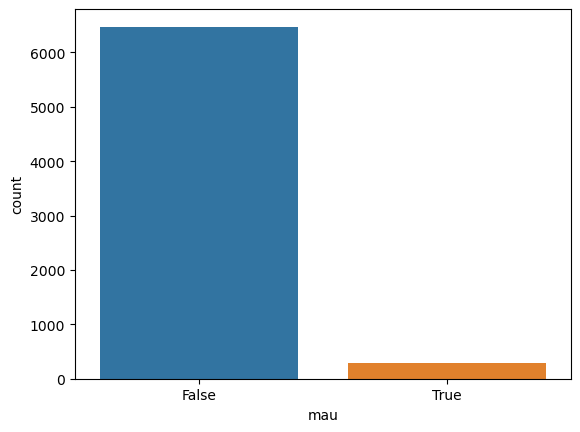

In [9]:
sns.countplot(x='mau', data=df)

#### 2) Vamos montar um metadados

1. Crie um dataframe com os nomes de cada variável e o tipo de dados de cada variável.
2. Adicione uma coluna nesse *dataframe* chamada "qtd_categorias" e coloque nela o número de categorias correspondente de cada variável. 
    Dica: 
        1. inicie uma lista vazia
        2. faça um for ao longo dos nomes das variáveis, 
        3. conte o número de categorias dessa variável 
        4. acumule essa informação de 3. na lista que você criou em 1. 
        5. No final, essa lista pode ser atribuída à nossa variável.
3. Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}.

In [10]:
#DataFrame com nome e tipo de cada variável
dados = {
    'sexo': 'object',
    'posse_de_veiculo': 'object',
    'posse_de_imovel': 'object',
    'qtd_filhos': 'int64',
    'tipo_renda': 'object',
    'educacao': 'object',
    'estado_civil': 'object',
    'tipo_residencia': 'object',
    'idade': 'float64',
    'tempo_emprego': 'float64',
    'possui_celular': 'int64',
    'possui_fone_comercial': 'int64',
    'possui_fone': 'int64',
    'possui_email': 'int64',
    'qt_pessoas_residencia': 'float64',
    'mau': 'bool'
}

df_metadados = pd.DataFrame({'variavel': list(dados.keys()), 'tipo': list(dados.values())})

df_metadados

,variavel,tipo
0,sexo,object
1,posse_de_veiculo,object
2,posse_de_imovel,object
3,qtd_filhos,int64
4,tipo_renda,object
5,educacao,object
6,estado_civil,object
7,tipo_residencia,object
8,idade,float64
9,tempo_emprego,float64


In [11]:
#Adicione uma coluna nesse dataframe chamada "qtd_categorias" e coloque nela o número de categorias 
#correspondente de cada variável.
qtd_categorias = []

for variavel in df_metadados['variavel']:
    if df_metadados.loc[df_metadados['variavel'] == variavel, 'tipo'].iloc[0] == 'object':
        qtd_categorias.append(len(df[variavel].unique()))
    else:
        qtd_categorias.append(0)

df_metadados['qtd_categorias'] = qtd_categorias
df_metadados

,variavel,tipo,qtd_categorias
0,sexo,object,2
1,posse_de_veiculo,object,2
2,posse_de_imovel,object,2
3,qtd_filhos,int64,0
4,tipo_renda,object,5
5,educacao,object,5
6,estado_civil,object,5
7,tipo_residencia,object,6
8,idade,float64,0
9,tempo_emprego,float64,0


In [12]:
# Criação das variáveis dummy
dummies = pd.get_dummies(df[['tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia']], dtype=int)
df = pd.concat([df, dummies], axis=1)
df.drop(['tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia'], axis=1, inplace=True)
df

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,...,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,M,Y,Y,0,58.832877,3.106849,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,F,N,Y,0,52.356164,8.358904,1,0,1,1,...,0,0,1,0,0,1,0,0,0,0
3,M,Y,Y,0,46.224658,2.106849,1,1,1,1,...,1,0,0,0,0,1,0,0,0,0
4,F,Y,N,0,29.230137,3.021918,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
6,F,N,Y,0,27.482192,4.024658,1,0,1,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16644,F,N,Y,1,34.857534,3.101370,1,1,1,0,...,0,0,1,0,0,1,0,0,0,0
16645,F,N,Y,0,54.109589,9.884932,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
16646,F,N,Y,0,43.389041,7.380822,1,1,1,0,...,1,0,0,0,0,1,0,0,0,0
16647,M,Y,Y,0,30.005479,9.800000,1,1,0,0,...,1,0,0,0,0,1,0,0,0,0


In [13]:
df = df.replace('Y', 1).replace('N', 0)
df['qt_pessoas_residencia'] = df['qt_pessoas_residencia'].astype(int)
df['idade'] = df['idade'].astype(int)
df['tempo_emprego'] = df['tempo_emprego'].astype(int)
df['sexo_M'] = df['sexo'].map({'M': 1, 'F':0})
df = df.drop('sexo', axis=1)
df.dtypes

posse_de_veiculo                          int64
posse_de_imovel                           int64
qtd_filhos                                int64
idade                                     int32
tempo_emprego                             int32
possui_celular                            int64
possui_fone_comercial                     int64
possui_fone                               int64
possui_email                              int64
qt_pessoas_residencia                     int32
mau                                        bool
tipo_renda_Commercial associate           int32
tipo_renda_Pensioner                      int32
tipo_renda_State servant                  int32
tipo_renda_Student                        int32
tipo_renda_Working                        int32
educacao_Academic degree                  int32
educacao_Higher education                 int32
educacao_Incomplete higher                int32
educacao_Lower secondary                  int32
educacao_Secondary / secondary special  

#### 3) Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}. Crie um *dataframe* apenas com as variáveis apropriadas para entrada no scikitlearn - elimine as variáveis tipo *str*, mantendo apenas suas versões *dummy*.

#### 4) Qual variável é mais poderosa?

Considere as variáveis ```possui_email``` e ```posse_de_veiculo```. Faça uma tabela cruzada entre elas e responda qual delas te parece mais poderosa para prever a probabilidade de ```mau = 1```?

In [14]:
crosstab_email = pd.crosstab(df['possui_email'], df['mau'], normalize='index')
crosstab_veiculo = pd.crosstab(df['posse_de_veiculo'], df['mau'], normalize='index')

print("Tabela Cruzada para a variável 'possui_email':")
print(crosstab_email)
print("\nTabela Cruzada para a variável 'posse_de_veiculo':")
print(crosstab_veiculo)

Tabela Cruzada para a variável 'possui_email':
mau              False     True 
possui_email                    
0             0.955197  0.044803
1             0.964602  0.035398

Tabela Cruzada para a variável 'posse_de_veiculo':
mau                  False     True 
posse_de_veiculo                    
0                 0.954880  0.045120
1                 0.957796  0.042204


Em relação às variáveis possui_email e posse_de_veículo, podemos considerar que possui_email é mais poderosa, pois apresenta uma diferença mais significativa nas taxas de inadimplência.

#### 5) Salve a base, pois ela será utilizada no final deste módulo.

In [15]:
df.to_csv('credito_analise.csv', index=False)